## EKLAVYA SHARMA
### 8902545

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#### step 1-  frame the question, predicting Y from X
#### step 2- fetch the data, inbuilt diabetes dataset from sci kit learn

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

step 3- explore the data, 

In [5]:
diabetes_X.shape

(442, 10)

#### hence we can see, the data has 10 features and 442 data points, https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
###### age age in years, sex, bmi body mass index, bp average blood pressure,s1 tc, total serum cholesterols2 ldl, low-density lipoproteins
###### s3 hdl, high-density lipoproteins
###### s4 tch, total cholesterol / HDL
###### s5 ltg, possibly log of serum triglycerides level
###### s6 glu, blood sugar level

In [31]:
for i in range(diabetes_X.shape[1]):
    print(type(diabetes_X[0][i]))
    min = np.min(diabetes_X[:,i])
    max = np.max(diabetes_X[:,i])
    print("min - {}, max - {}, range - {}".format(min,max,max-min))

<class 'numpy.float64'>
min - -0.1072256316073538, max - 0.11072667545381144, range - 0.21795230706116525
<class 'numpy.float64'>
min - -0.044641636506989144, max - 0.05068011873981862, range - 0.09532175524680776
<class 'numpy.float64'>
min - -0.09027529589850945, max - 0.17055522598064407, range - 0.2608305218791535
<class 'numpy.float64'>
min - -0.11239880254408448, max - 0.13204361674121307, range - 0.24444241928529753
<class 'numpy.float64'>
min - -0.12678066991651324, max - 0.15391371315651542, range - 0.28069438307302863
<class 'numpy.float64'>
min - -0.11561306597939897, max - 0.19878798965729408, range - 0.31440105563669307
<class 'numpy.float64'>
min - -0.10230705051741597, max - 0.18117906039727852, range - 0.2834861109146945
<class 'numpy.float64'>
min - -0.0763945037500033, max - 0.18523444326019867, range - 0.26162894701020195
<class 'numpy.float64'>
min - -0.12609712083330468, max - 0.13359728192191356, range - 0.25969440275521827
<class 'numpy.float64'>
min - -0.1377672

hence we see all the columns are of type float, within a very small range

<Axes: >

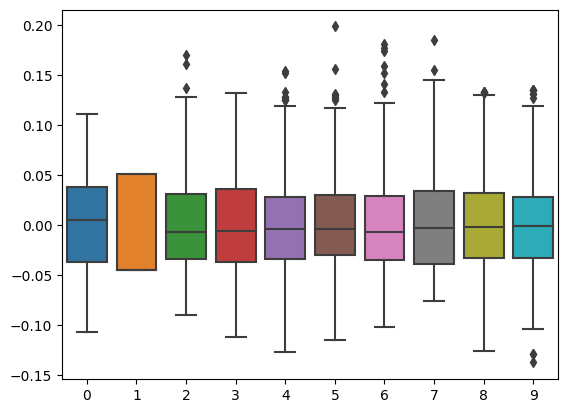

In [38]:
sns.boxplot(data = diabetes_X)

we can see that the data roughly lies in the same range, centered around 0. and a few features have a good number of outliers 6,9,4

<Axes: ylabel='Density'>

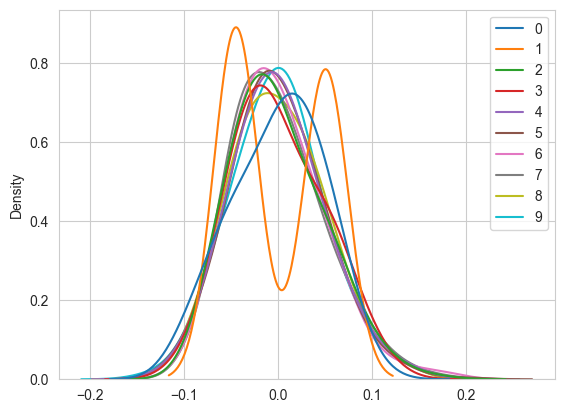

In [40]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(diabetes_X), bw_method=0.5)

all the features except 1 are of normal distribution and 1 is a bimodal feature, they have roughly the same mean 0 , i.e. all have been normalised 

#### Run a univariate linear regression between bmi body mass index (independent variable) and a quantitative measure of disease progression one year after baseline(this is diabetes_y in the code below - and the dependent variable)

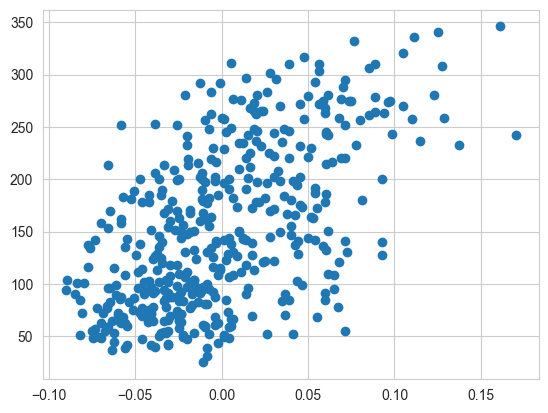

In [42]:
plt.scatter(diabetes_X[: ,2], diabetes_y)

## this represents a moderate positive correlation

In [53]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X[: ,2].reshape(-1, 1), diabetes_y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_pred)
train_loss, "\n" , test_loss

(3854.11265207582, '\n', 4061.8259284949268)

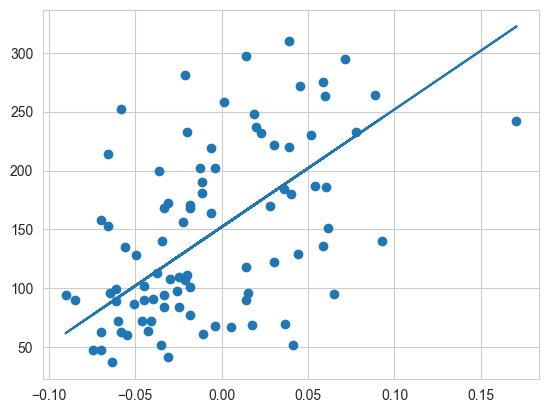

In [61]:
## training data vs predicted line
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, label='pred')

In [59]:
## printing the coeffiecent and intercept, since its a uinvariate regression, only one coeff , y= mx+c
slope = model.coef_[0]
intercept = model.intercept_
slope, intercept

(998.5776891375593, 152.00335421448167)

## the plot does not fit the data in a good way and represents and is clearly a case of underfit